## Create training datasets for decoder

2025-04-08 16:44:18.526625: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-08 16:44:18.548034: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-08 16:44:18.548052: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-08 16:44:18.548075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-08 16:44:18.552688: I tensorflow/core/platform/cpu_feature_g

Sesison path: ../../Data/t18/t18.2025.01.14/Typing
tfdata path: ../../Data/t18/t18.2025.01.14/Typing


mat_to_tfrecord_V3.py input parameters:
	Session mat path: ../../Data/t18/t18.2025.01.14/Typing
	Block numbers: [1, 2, 3, 4, 5, 6, 7, 9]
	Number of test trials: 10
	Trials to remove: {1: [0], 2: [2], 3: [4], 4: [1, 8], 10: [0, 3]}
	Channels to exclude: []
	Channels to zero: []
	Include threshold crossings: True
	Include spike power: True
	Spike power max: 50000
	Z-score data: True
	Global std: True
	Bin compression factor: 2
	Save path: ../../Data/t18/t18.2025.01.14/Typing/tfdata_20ms


RedisMat file for block 1: ../../Data/t18/t18.2025.01.14/Typing/RedisMat/20250114_125630_(1).mat
Removed block 1's trial 0 because it was manually specified as bad.
RedisMat file for block 2: ../../Data/t18/t18.2025.01.14/Typing/RedisMat/20250114_131206_(2).mat
Removed block 2's trial 2 because it was manually specified as bad.
RedisMat file for block 3: ../../Data/t18/t18.2025.01.14/Typing/RedisMat/20

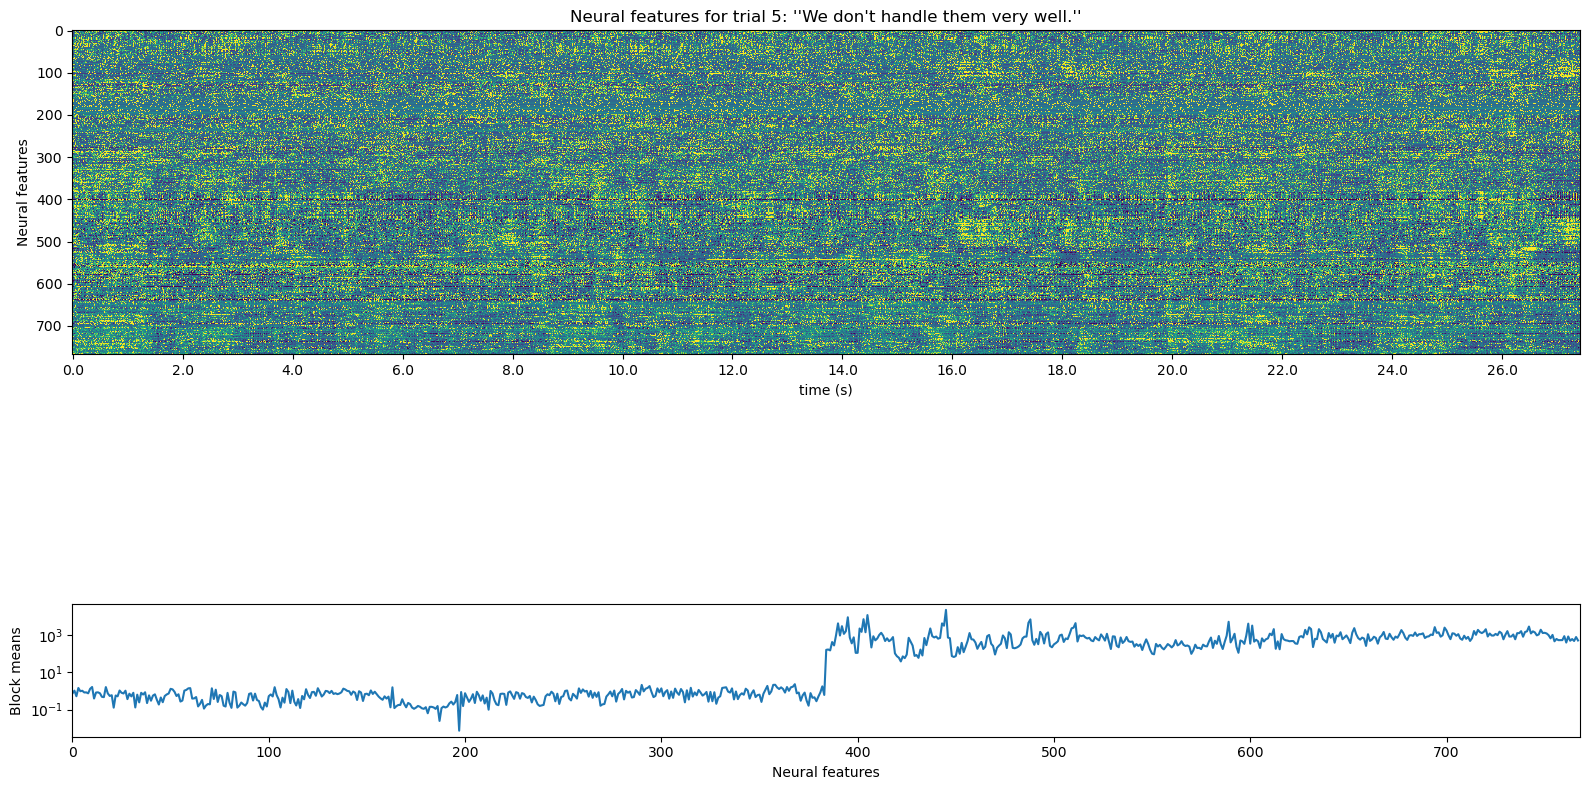

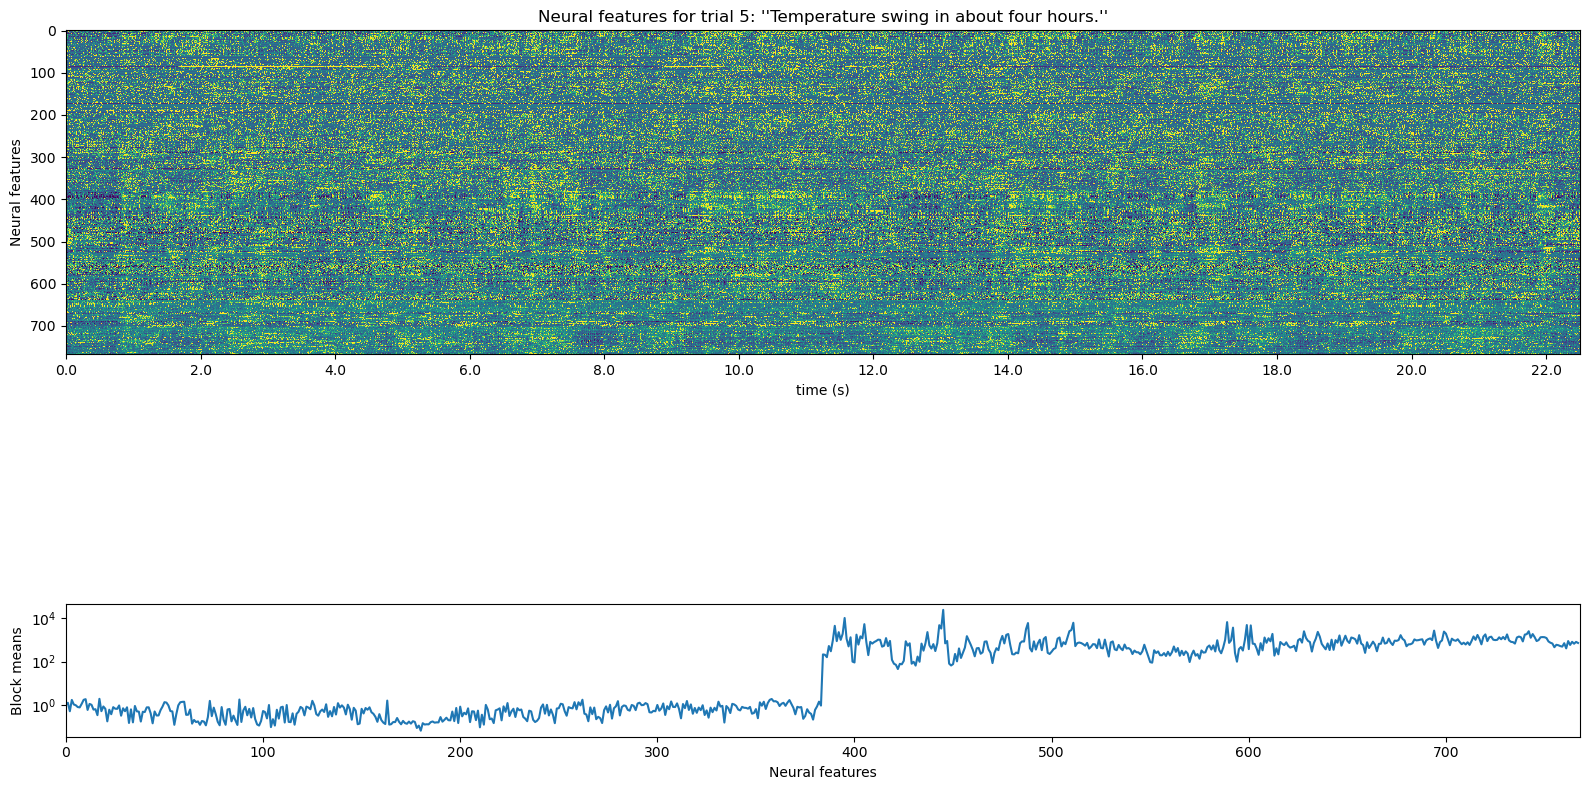

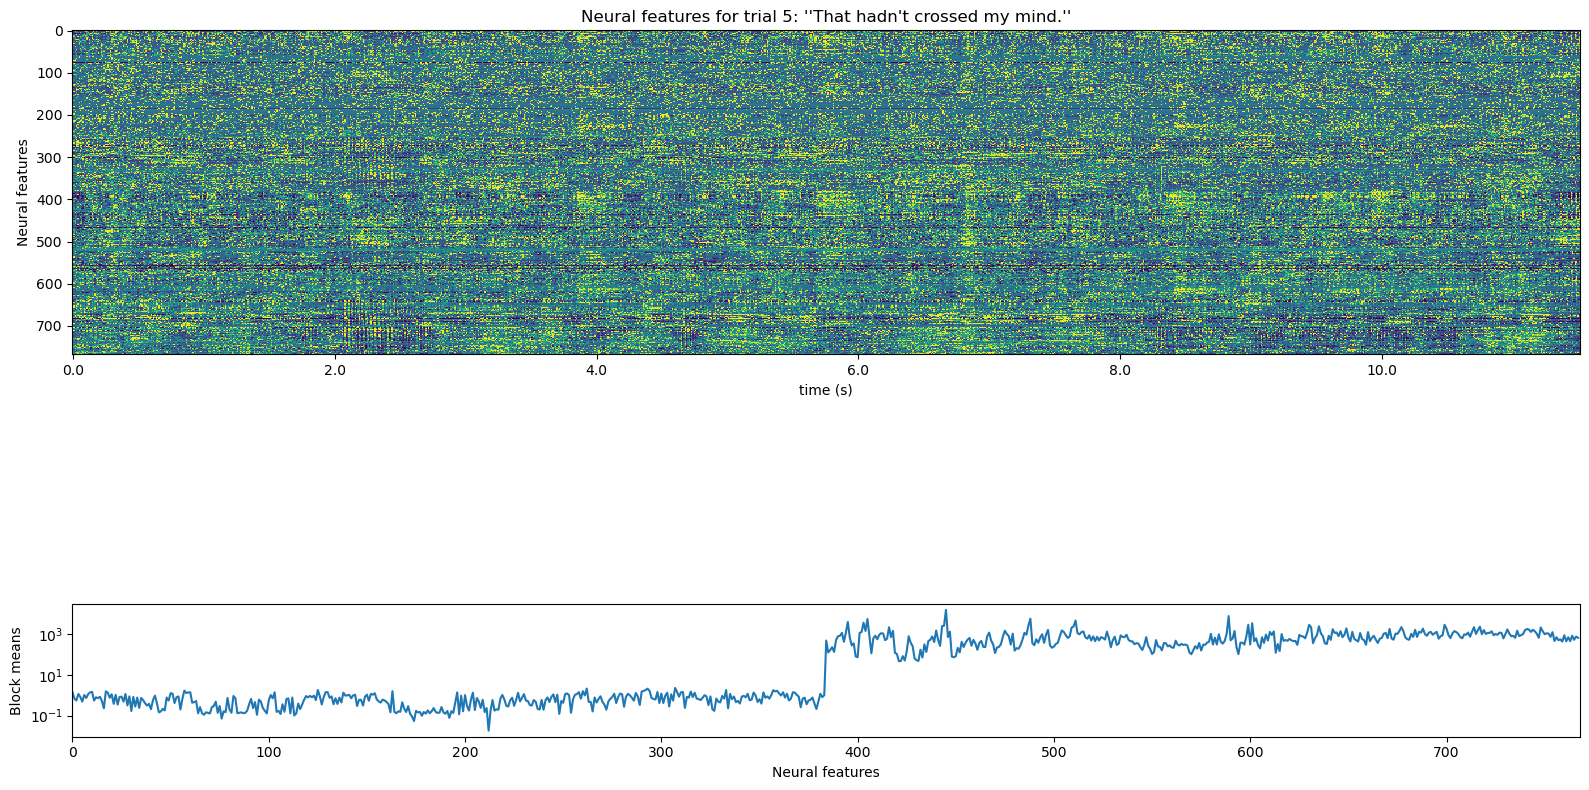

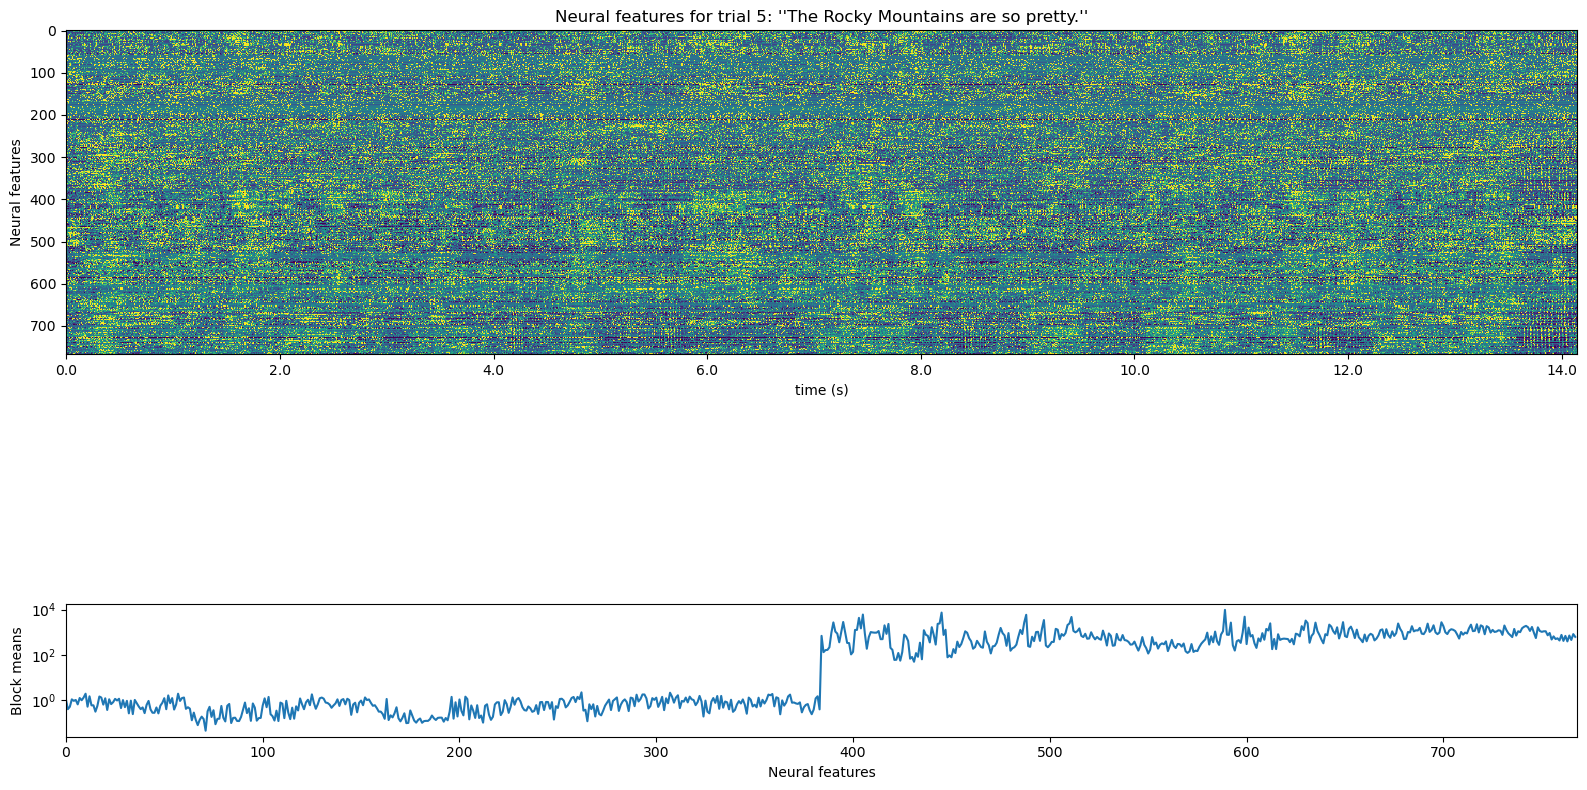

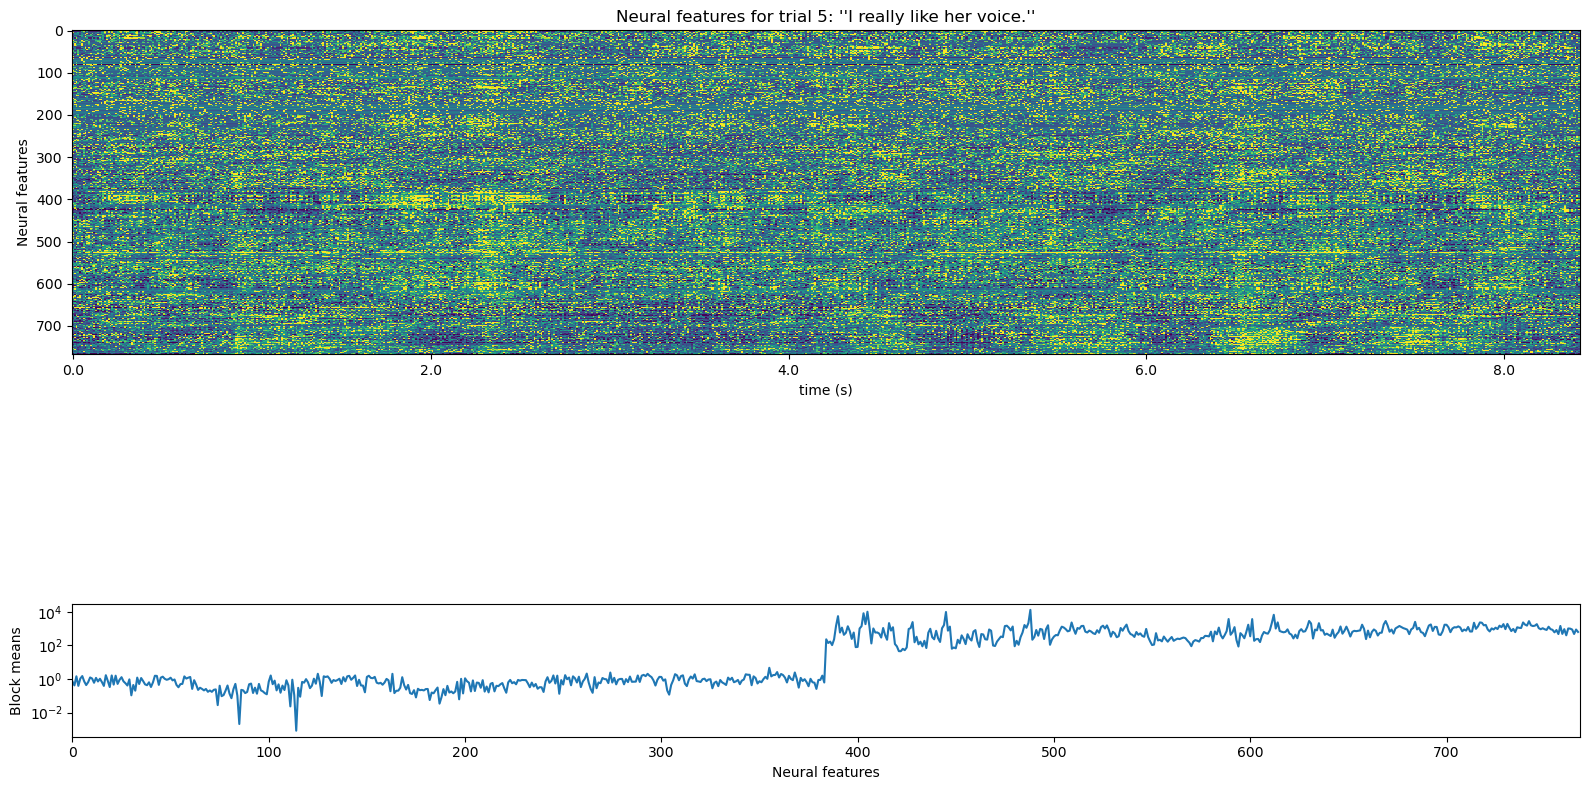

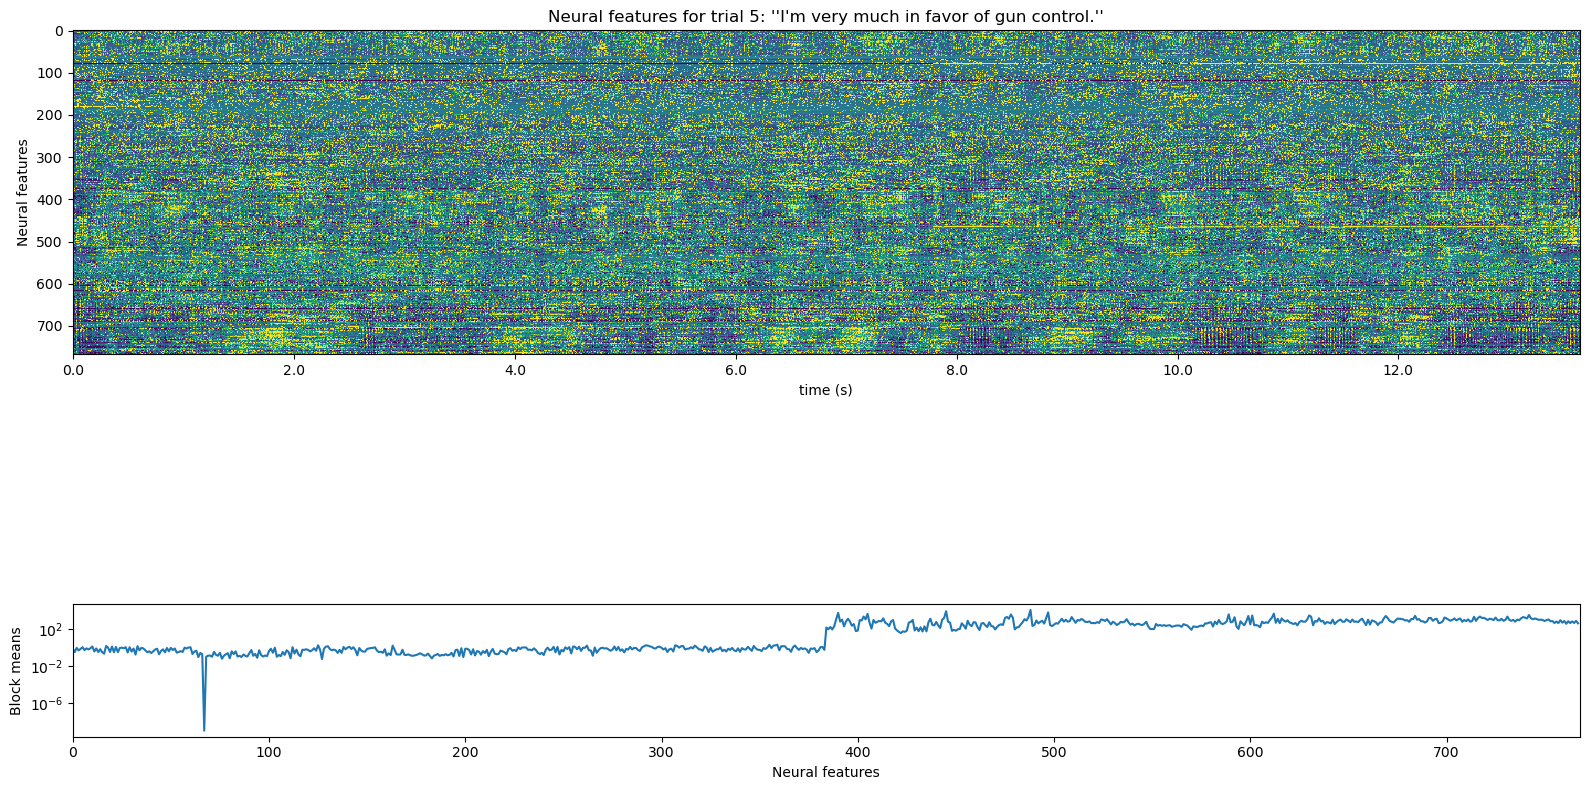

In [1]:
import sys
sys.path.append('../../')
import utils.mat_to_tfrecord
from pathlib import Path
import numpy as np
from T18_SessionArgsStability import get_session_info

sessions = [
    't18.2025.01.14',
    't18.2025.01.15',
    't18.2025.01.21',
    't18.2025.01.22',
    't18.2025.02.04',
    't18.2025.02.05'
     ]

participant = 't18'
bin_compression_factor = 2
channels_to_exclude = list(range(0,0))
channels_to_zero = list(range(0,0))

for session in sessions:
    
    trials_to_remove, block_nums, num_test_trials = get_session_info(session)
    session_path = str(Path('../../Data', participant, session, 'Typing'))
    tfdata_path = str(Path(session_path, 'tfdata_20ms'))

    print(f'Sesison path: {session_path}')
    print(f'tfdata path: {session_path}')
    print('\n')

    args = {
        'session_mat_path': session_path,
        'block_nums': block_nums,
        'num_test_trials': num_test_trials,
        'trials_to_remove': trials_to_remove,
        'channels_to_exclude': channels_to_exclude,
        'channels_to_zero': channels_to_zero,
        'include_thresh_crossings': True,
        'include_spike_power': True,
        'spike_pow_max': 50000,
        'z_score_data': True,
        'global_std': True,
        'bin_compression_factor': bin_compression_factor,
        'save_path': tfdata_path,
    }

    utils.mat_to_tfrecord.main(args)

## Train the decoder. Remember to Restart the notebook first!

In [1]:
from omegaconf import OmegaConf
import sys
sys.path.append('../../')
from utils.brainToText_trainDecoder import brainToText_decoder

args = OmegaConf.load('T18_trainArgsStability.yaml')

decoder = brainToText_decoder(args)

infOut, stats = decoder.train()

2025-04-08 17:53:17.132493: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-08 17:53:17.154696: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-08 17:53:17.154711: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-08 17:53:17.154733: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-08 17:53:17.159474: I tensorflow/core/platform/cpu_feature_g

2025-04-08 17:53:18,114: Using GPU #: 0


2025-04-08 17:53:18.127086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-08 17:53:18.173706: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-08 17:53:18.173843: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 multiple                  17304576  
                                                                 
 gru_2 (GRU)                 multiple                  1575936   
                                                                 
 gru_3 (GRU)                 multiple                  1575936   
                                                                 
 gru_4 (GRU)                 multiple                  1575936   
                                                                 
 gru_5 (GRU)                 multiple                  1575936   
                                                                 
 dense (Dense)               multiple                  15903     
                                                                 
Total params: 23624735 (90.12 MB)
Trainable params: 23624735 (9

2025-04-08 17:53:24.199954: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2025-04-08 17:53:24.587341: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7a49ec004300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-04-08 17:53:24.587359: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2025-04-08 17:53:24.590336: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-04-08 17:53:24.648522: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2025-04-08 17:53:25,321: Train batch 0: loss: 1402.74 gradNorm: 490.29 
2025-04-08 17:53:25,512: Val batch: CER (t18.2025.01.14): 1.348
2025-04-08 17:53:25,513: Val batch 0: CER (avg): 1.348 
2025-04-08 17:53:25,513: Batches since validation CER improved: 50
2025-04-08 17:53:25,739: Train batch 1: loss: 1278.98 gradNorm: 635.53 
2025-04-08 17:53:25,964: Train batch 2: loss: 1308.83 gradNorm: 862.00 
2025-04-08 17:53:26,219: Train batch 3: loss: 1245.42 gradNorm: 1059.67 
2025-04-08 17:53:26,468: Train batch 4: loss: 1053.83 gradNorm: 1104.62 
2025-04-08 17:53:26,720: Train batch 5: loss: 992.17 gradNorm: 1313.34 
2025-04-08 17:53:26,973: Train batch 6: loss: 821.62 gradNorm: 1440.70 
2025-04-08 17:53:27,228: Train batch 7: loss: 636.38 gradNorm: 1528.33 
2025-04-08 17:53:27,485: Train batch 8: loss: 442.81 gradNorm: 1490.24 
2025-04-08 17:53:27,728: Train batch 9: loss: 243.44 gradNorm: 1019.70 
2025-04-08 17:53:27,988: Train batch 10: loss: 153.32 gradNorm: 525.69 
2025-04-08 17:53:28

KeyboardInterrupt: 

In [1]:
import sys
import os
sys.path.append('../../')
import lm_decoder
from utils.lmutils import cer_with_lm_decoder, build_lm_decoder

lmDir = '../../LanguageModels/Typing5gramPunc'

ngramDecoder = build_lm_decoder(
    lmDir,
    max_active=7000,
    min_active=200,
    beam=17,
    lattice_beam=8,
    acoustic_scale=0.23, #lower means weight LM more highly
    ctc_blank_skip_threshold=1.0,
    length_penalty=0.0,
    nbest=100)


I0408 17:55:20.894515 125444 brain_speech_decoder.h:52] Reading fst ../../LanguageModels/Typing5gramPunc/TLG.fst
I0408 17:56:12.223431 125444 brain_speech_decoder.h:58] Reading lm fst ../../LanguageModels/Typing5gramPunc/G.fst
I0408 17:56:25.480906 125444 brain_speech_decoder.h:70] Reading rescore fst ../../LanguageModels/Typing5gramPunc/G_no_prune.fst
I0408 17:58:20.866406 125444 brain_speech_decoder.h:81] Reading symbol table ../../LanguageModels/Typing5gramPunc/words.txt


In [2]:
from omegaconf import OmegaConf
import sys
import numpy as np
sys.path.append('../../')
from utils.brainToText_trainDecoder import brainToText_decoder
from utils.lmutils import cer_with_lm_decoder
days_list = [0,1, 6, 7, 22, 23]
sessions = [
    't18.2025.01.14',
    't18.2025.01.15',
    't18.2025.01.21',
    't18.2025.01.22',
    't18.2025.02.04',
    't18.2025.02.05'
     ]
for s, day in enumerate(days_list):
    args = OmegaConf.load('T18_trainArgsStability.yaml')
    print(args)
    args['dataset']['sessions'] = [sessions[s]]
    args['dataset']['dataDir'] = ['../../Data/t18/' + sessions[s] + '/Typing/tfdata_20ms']
    print(args)
    decoder = brainToText_decoder(args)
    out, out_by_day = decoder.inference()
    decoder_out = cer_with_lm_decoder(ngramDecoder, out, blankPenalty=4, rescore=False)
    np.save('T18Day-' +str(day) + '-PostLMWERs.npy',decoder_out['all_wer'])

2025-04-08 17:58:21.090792: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-08 17:58:21.111939: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-08 17:58:21.111958: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-08 17:58:21.111979: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-08 17:58:21.116364: I tensorflow/core/platform/cpu_feature_g

{'dataset': {'name': 'typing', 'sessions': ['t18.2025.01.14'], 'datasetProbabilityVal': [1.0], 'dataDir': ['../../Data/t18/t18.2025.01.14/Typing/tfdata_20ms'], 'whiteNoiseSD': 1.3, 'constantOffsetSD': 0.22, 'randomWalkSD': 0, 'nInputFeatures': 768, 'staticGainSD': 0, 'randomCut': 0, 'nClasses': 30, 'maxSeqElements': 60, 'bufferSize': 512}, 'model': {'nUnits': 512, 'inputLayerSize': 768, 'subsampleFactor': 1, 'weightReg': 1e-05, 'actReg': 0.0, 'dropout': 0.6, 'trainable': True, 'nLayers': 5, 'patch_size': 14, 'patch_stride': 5, 'inputNetwork': {'nInputLayers': 1, 'inputLayerSizes': [768], 'trainable': True, 'activation': 'softsign', 'dropout': 0.25}}, 'gpuNumber': '0', 'mode': 'train', 'outputDir': 'T18Models/0days', 'loadDir': 'T18Models/0days', 'loadCheckpointIdx': None, 'smoothInputs': 1, 'smoothKernelSD': 2, 'learnRateStart': 0.02, 'learnRateEnd': 0.0, 'learnRateDecaySteps': 10000, 'learnRatePower': 1.0, 'trainableInput': True, 'trainableBackend': True, 'seed': -1, 'batchesPerSave':

2025-04-08 17:58:22.013795: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-08 17:58:22.055232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-04-08 17:58:22.055389: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 multiple                  17304576  
                                                                 
 gru_2 (GRU)                 multiple                  1575936   
                                                                 
 gru_3 (GRU)                 multiple                  1575936   
                                                                 
 gru_4 (GRU)                 multiple                  1575936   
                                                                 
 gru_5 (GRU)                 multiple                  1575936   
                                                                 
 dense (Dense)               multiple                  15903     
                                                                 
Total params: 23624735 (90.12 MB)
Trainable params: 23624735 (9

2025-04-08 17:58:24.433186: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600


[30 30 30 30 30 30 30 30 30 30 30 30 30  8  8  8  8  8 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 11 11 11 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 11 11 11 11 11 11 11 30 30 30 30 30 30 30
 30 30 30 30  8  8  8  8 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 17 17 17 17 17 30 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 11 11 11 11  0  0
  0  0 30 30 30 30 30 30 30 30 30 30 12 12 12 12 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30  0  0  0  0 30 30 30 30 30 30 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30  9  9  9 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 12 12 12 12 12 30 30 30 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 21 21 21 21 21 30 30 30
 30 30 30 30 30 30 30 30 30 30 30 22 22 22 30 30 30 30 30 30 30 30 30 30
 30 30 23 23 23 23 23 23 23 30 30 30 30 30 30 30 30


KeyboardInterrupt

